In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
import os

In [2]:
### CHANGE THIS TO WHERE DATA IS STORED
path = '../data/yelp_dataset/'

### Preprocessing of restaurants features

In [3]:
business = pd.read_json(path+'yelp_academic_dataset_business.json', lines=True)
business = business[business['categories'].notna()]

searchfor = ['food', 'restaurant','dessert']
restaurants = business[business['categories'].str.contains('|'.join(searchfor),case=False)]

pop_res = restaurants[restaurants['review_count'] >= 50]
pop_res.reset_index(drop=True,inplace=True)
pop_res

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
4,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,-R9t30RvsG-Rtiq63yuEmg,Crescent No Lawyers Bar-Grill,5500 W Franklin Rd,Boise,ID,83706,43.603368,-116.250063,2.5,55,0,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","American (Traditional), Nightlife, Bars, Resta...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
22439,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
22440,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,63108,38.641988,-90.261655,4.0,71,1,"{'RestaurantsPriceRange2': '3', 'DogsAllowed':...","Health Markets, Specialty Food, Food, Grocery","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
22441,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."


In [4]:
filter_null_res = pop_res[ pop_res['attributes'].notnull() ]
filter_null_res

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
4,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,-R9t30RvsG-Rtiq63yuEmg,Crescent No Lawyers Bar-Grill,5500 W Franklin Rd,Boise,ID,83706,43.603368,-116.250063,2.5,55,0,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","American (Traditional), Nightlife, Bars, Resta...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
22439,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
22440,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,63108,38.641988,-90.261655,4.0,71,1,"{'RestaurantsPriceRange2': '3', 'DogsAllowed':...","Health Markets, Specialty Food, Food, Grocery","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
22441,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."


In [5]:
rows = list(filter_null_res.index)

In [6]:
pop_res = pd.DataFrame(filter_null_res)
pop_res.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22433, 22434, 22435, 22436, 22437, 22438, 22439, 22440, 22441,
            22442],
           dtype='int64', length=22434)

In [16]:
filter_null_res.info()
# [k for k,v in filter_null_res.attributes[0]]
list(filter_null_res.attributes[10].keys())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22434 entries, 0 to 22442
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22434 non-null  object 
 1   name          22434 non-null  object 
 2   address       22434 non-null  object 
 3   city          22434 non-null  object 
 4   state         22434 non-null  object 
 5   postal_code   22434 non-null  object 
 6   latitude      22434 non-null  float64
 7   longitude     22434 non-null  float64
 8   stars         22434 non-null  float64
 9   review_count  22434 non-null  int64  
 10  is_open       22434 non-null  int64  
 11  attributes    22434 non-null  object 
 12  categories    22434 non-null  object 
 13  hours         21774 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.1+ MB


['RestaurantsTakeOut',
 'RestaurantsReservations',
 'RestaurantsAttire',
 'OutdoorSeating',
 'BestNights',
 'RestaurantsTableService',
 'Ambience',
 'RestaurantsPriceRange2',
 'Alcohol',
 'RestaurantsGoodForGroups',
 'BikeParking',
 'BusinessAcceptsCreditCards',
 'GoodForKids',
 'HappyHour',
 'WiFi',
 'CoatCheck',
 'BusinessParking',
 'GoodForMeal',
 'WheelchairAccessible',
 'NoiseLevel',
 'Caters',
 'HasTV',
 'Music',
 'Smoking',
 'RestaurantsDelivery',
 'GoodForDancing']

In [22]:
import ast
from tqdm import tqdm
attributes = pd.DataFrame()


for row in tqdm(rows):
  d = pop_res.loc[row,'attributes']

  attr = pd.DataFrame(d,index=[row])
  # extra_layer_unfiltered = ['BusinessParking','GoodForMeal','Ambience']
  # extra_layer = [e for e in extra_layer_unfiltered if e in attr.columns]
  extra_layer = ['BusinessParking','GoodForMeal','Ambience']

  for item in extra_layer:
    try:
        s = attr.loc[row,item]
    except KeyError:
        continue
    if type(s) == pd._libs.missing.NAType:
      continue
    col = pd.DataFrame(ast.literal_eval(s),index=[row])
    attr = pd.concat([attr,col],axis=1)

  attr.drop(columns=extra_layer, inplace=True, errors="ignore")
  attributes = pd.concat([attributes,attr],axis=0)


100%|██████████| 22434/22434 [05:17<00:00, 70.73it/s]


In [23]:
attributes

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,...,CoatCheck,BYOB,DriveThru,Corkage,BYOBCorkage,AcceptsInsurance,RestaurantsCounterService,Open24Hours,DietaryRestrictions,AgesAllowed
0,False,False,False,True,1,True,False,u'free',u'none',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,False,True,True,1,True,NaN,u'no',u'none',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,True,True,NaN,2,True,NaN,'free','full_bar',NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,True,True,1,True,NaN,u'no',u'none',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,True,True,True,2,True,NaN,u'free','full_bar',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,False,True,True,True,2,True,NaN,u'no',u'full_bar',False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22439,True,False,True,True,2,True,NaN,'no',u'none',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22440,None,NaN,True,True,3,True,False,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22441,False,False,True,True,3,False,True,u'free','full_bar',False,...,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
attributes.columns

Index(['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut',
       'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters', 'garage', 'street',
       'validated', 'lot', 'valet', 'RestaurantsGoodForGroups',
       'RestaurantsAttire', 'NoiseLevel', 'GoodForKids',
       'BusinessAcceptsBitcoin', 'RestaurantsTableService',
       'RestaurantsReservations', 'HasTV', 'WheelchairAccessible', 'dessert',
       'latenight', 'lunch', 'dinner', 'brunch', 'breakfast', 'romantic',
       'intimate', 'touristy', 'hipster', 'divey', 'classy', 'trendy',
       'upscale', 'casual', 'DogsAllowed', 'HappyHour', 'Smoking', 'Music',
       'GoodForDancing', 'BestNights', 'CoatCheck', 'BYOB', 'DriveThru',
       'Corkage', 'BYOBCorkage', 'AcceptsInsurance',
       'RestaurantsCounterService', 'Open24Hours', 'DietaryRestrictions',
       'AgesAllowed'],
      dtype='object')

In [25]:
null_count = attributes.isna().sum()

#if more than 20% is null -> drop
attributes.dropna(thresh=len(attributes)*0.8, axis=1,inplace=True)
attributes

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,garage,...,valet,RestaurantsGoodForGroups,RestaurantsAttire,NoiseLevel,GoodForKids,RestaurantsReservations,HasTV,romantic,upscale,casual
0,False,False,False,True,1,True,u'free',u'none',True,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,False,True,True,1,True,u'no',u'none',True,False,...,False,False,u'casual',u'average',True,False,True,False,False,True
2,True,True,True,NaN,2,True,'free','full_bar',NaN,None,...,False,True,'casual',u'average',False,True,False,False,False,False
3,None,None,True,True,1,True,u'no',u'none',True,False,...,False,False,u'casual',u'quiet',True,False,True,False,False,True
4,True,True,True,True,2,True,u'free','full_bar',True,False,...,False,True,'casual',u'average',True,True,True,None,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,False,True,True,True,2,True,u'no',u'full_bar',False,False,...,False,True,u'casual',u'loud',True,True,True,False,False,False
22439,True,False,True,True,2,True,'no',u'none',True,False,...,False,False,u'casual',u'average',True,False,True,False,False,True
22440,None,NaN,True,True,3,True,NaN,NaN,True,True,...,False,NaN,NaN,u'average',True,NaN,NaN,NaN,NaN,NaN
22441,False,False,True,True,3,False,u'free','full_bar',False,True,...,True,True,u'dressy',u'average',True,True,True,True,None,None


In [28]:
attributes.replace(to_replace = {'False': '0', 'True': '1', 'None': pd.NA},inplace=True)
cols_to_process = ['Alcohol','NoiseLevel','RestaurantsAttire','WiFi']
cols_to_int = ['BikeParking','BusinessAcceptsCreditCards','Caters','GoodForKids','HasTV','OutdoorSeating','RestaurantsDelivery','RestaurantsGoodForGroups','RestaurantsPriceRange2','RestaurantsReservations','RestaurantsTakeOut',
               'garage','street','validated','lot','valet','romantic', 'intimate', 'touristy', 'hipster', 'divey',
       'classy', 'trendy', 'upscale', 'casual']

for col in cols_to_int:
  try:
    attributes[col] = attributes[col].astype(int, errors="ignore")
  except KeyError:
    continue
attributes

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,garage,...,valet,RestaurantsGoodForGroups,RestaurantsAttire,NoiseLevel,GoodForKids,RestaurantsReservations,HasTV,romantic,upscale,casual
0,0,0,0,1,1,1,u'free',u'none',1,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1,1,1,1,u'no',u'none',1,False,...,False,0,u'casual',u'average',1,0,1,False,False,True
2,1,1,1,NaN,2,1,'free','full_bar',NaN,None,...,False,1,'casual',u'average',0,1,0,False,False,False
3,<NA>,<NA>,1,1,1,1,u'no',u'none',1,False,...,False,0,u'casual',u'quiet',1,0,1,False,False,True
4,1,1,1,1,2,1,u'free','full_bar',1,False,...,False,1,'casual',u'average',1,1,1,None,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,0,1,1,1,2,1,u'no',u'full_bar',0,False,...,False,1,u'casual',u'loud',1,1,1,False,False,False
22439,1,0,1,1,2,1,'no',u'none',1,False,...,False,0,u'casual',u'average',1,0,1,False,False,True
22440,<NA>,NaN,1,1,3,1,NaN,NaN,1,True,...,False,NaN,NaN,u'average',1,NaN,NaN,NaN,NaN,NaN
22441,0,0,1,1,3,0,u'free','full_bar',0,True,...,True,1,u'dressy',u'average',1,1,1,True,None,None


In [29]:
attributes.Alcohol[attributes.Alcohol == "u'none'"] = 0
attributes.Alcohol[attributes.Alcohol == "'none'"] = 0
attributes.Alcohol[attributes.Alcohol == "u'beer_and_wine'"] = 1
attributes.Alcohol[attributes.Alcohol == "'beer_and_wine'"] = 1
attributes.Alcohol[attributes.Alcohol == "u'full_bar'"] = 2
attributes.Alcohol[attributes.Alcohol == "'full_bar'"] = 2

In [30]:
attributes.NoiseLevel[attributes.NoiseLevel == "u'quiet'"] = 0
attributes.NoiseLevel[attributes.NoiseLevel == "'quiet'"] = 0
attributes.NoiseLevel[attributes.NoiseLevel == "u'average'"] = 1
attributes.NoiseLevel[attributes.NoiseLevel == "'average'"] = 1
attributes.NoiseLevel[attributes.NoiseLevel == "u'loud'"] = 2
attributes.NoiseLevel[attributes.NoiseLevel == "'loud'"] = 2
attributes.NoiseLevel[attributes.NoiseLevel == "u'very_loud'"] = 3
attributes.NoiseLevel[attributes.NoiseLevel == "'very_loud'"] = 3

In [31]:
attributes.RestaurantsAttire[attributes.RestaurantsAttire == "u'casual'"] = 0
attributes.RestaurantsAttire[attributes.RestaurantsAttire == "'casual'"] = 0
attributes.RestaurantsAttire[attributes.RestaurantsAttire == "u'dressy'"] = 1
attributes.RestaurantsAttire[attributes.RestaurantsAttire == "'dressy'"] = 1
attributes.RestaurantsAttire[attributes.RestaurantsAttire == "u'formal'"] = 2
attributes.RestaurantsAttire[attributes.RestaurantsAttire == "'formal'"] = 2

In [32]:
attributes.WiFi[attributes.WiFi == "u'free'"] = 'free'
attributes.WiFi[attributes.WiFi == "u'no'"] = 'no'
attributes.WiFi[attributes.WiFi == "u'paid'"] = 'paid'

attributes.WiFi[attributes.WiFi == "'free'"] = 'free'
attributes.WiFi[attributes.WiFi == "'no'"] = 'no'
attributes.WiFi[attributes.WiFi == "'paid'"] = 'paid'

In [33]:
restaurants = pop_res.merge(attributes,left_index=True, right_index=True)
restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,valet,RestaurantsGoodForGroups,RestaurantsAttire,NoiseLevel,GoodForKids,RestaurantsReservations,HasTV,romantic,upscale,casual
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,...,False,0,0,1,1,0,1,False,False,True
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,False,1,0,1,0,1,0,False,False,False
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,False,0,0,0,1,0,1,False,False,True
4,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,...,False,1,0,1,1,1,1,None,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,-R9t30RvsG-Rtiq63yuEmg,Crescent No Lawyers Bar-Grill,5500 W Franklin Rd,Boise,ID,83706,43.603368,-116.250063,2.5,55,...,False,1,0,2,1,1,1,False,False,False
22439,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,...,False,0,0,1,1,0,1,False,False,True
22440,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,63108,38.641988,-90.261655,4.0,71,...,False,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
22441,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,True,1,1,1,1,1,1,True,None,None


In [34]:
### run this cell --> no need to rerun preprocessing
'''
restaurants = pd.read_csv(path+'restaurants_processed_w_reviews.csv',index_col=0)
#filtered_restaurants = pd.read_csv(path+'restaurants_processed.csv',index_col=0)
attributes = pd.read_csv(path+'attributes.csv',index_col=0)
restaurants.info()
#already drop attributes with too much nans
# 55 attributes -> 29 '''
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22434 entries, 0 to 22442
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 22434 non-null  object 
 1   name                        22434 non-null  object 
 2   address                     22434 non-null  object 
 3   city                        22434 non-null  object 
 4   state                       22434 non-null  object 
 5   postal_code                 22434 non-null  object 
 6   latitude                    22434 non-null  float64
 7   longitude                   22434 non-null  float64
 8   stars                       22434 non-null  float64
 9   review_count                22434 non-null  int64  
 10  is_open                     22434 non-null  int64  
 11  attributes                  22434 non-null  object 
 12  categories                  22434 non-null  object 
 13  hours                       217

In [35]:
restaurants.shape

(22434, 37)

In [37]:
restaurants.fillna(restaurants.mode().iloc[0],inplace=True)

In [38]:
restaurants.isnull().sum()

business_id                     0
name                            0
address                         0
city                            0
state                           0
postal_code                     0
latitude                        0
longitude                       0
stars                           0
review_count                    0
is_open                         0
attributes                      0
categories                      0
hours                         660
RestaurantsDelivery             0
OutdoorSeating                  0
BusinessAcceptsCreditCards      0
BikeParking                     0
RestaurantsPriceRange2          0
RestaurantsTakeOut              0
WiFi                            0
Alcohol                         0
Caters                          0
garage                          0
street                          0
validated                       0
lot                             0
valet                           0
RestaurantsGoodForGroups        0
RestaurantsAtt

In [39]:
wifi = pd.get_dummies(restaurants['WiFi'])
restaurants = pd.concat([restaurants,wifi],axis=1)
restaurants.drop(columns='WiFi', inplace=True)
attributes.drop(columns='WiFi',inplace=True)

In [41]:
restaurants.drop(columns='Unnamed: 0',inplace=True, errors="ignore")
restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForKids,RestaurantsReservations,HasTV,romantic,upscale,casual,free,no,paid
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1,1,0,1,False,False,True,1,0,0
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,...,1,1,0,1,False,False,True,0,1,0
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,1,0,1,0,False,False,False,1,0,0
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,0,1,0,1,False,False,True,0,1,0
4,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,...,1,1,1,1,False,False,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,-R9t30RvsG-Rtiq63yuEmg,Crescent No Lawyers Bar-Grill,5500 W Franklin Rd,Boise,ID,83706,43.603368,-116.250063,2.5,55,...,2,1,1,1,False,False,False,0,1,0
22439,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,...,1,1,0,1,False,False,True,0,1,0
22440,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,63108,38.641988,-90.261655,4.0,71,...,1,1,0,1,False,False,True,1,0,0
22441,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,1,1,1,1,True,False,True,1,0,0


### Preprocessing of reviews --> add to features

### EDA

In [42]:
features = ['stars','review_count'] +list(attributes.columns) + list(wifi.columns) + ['stars_calculated', 'useful', 'funny', 'cool']
label = 'is_open'

In [43]:
features

['stars',
 'review_count',
 'RestaurantsDelivery',
 'OutdoorSeating',
 'BusinessAcceptsCreditCards',
 'BikeParking',
 'RestaurantsPriceRange2',
 'RestaurantsTakeOut',
 'Alcohol',
 'Caters',
 'garage',
 'street',
 'validated',
 'lot',
 'valet',
 'RestaurantsGoodForGroups',
 'RestaurantsAttire',
 'NoiseLevel',
 'GoodForKids',
 'RestaurantsReservations',
 'HasTV',
 'romantic',
 'upscale',
 'casual',
 'free',
 'no',
 'paid',
 'stars_calculated',
 'useful',
 'funny',
 'cool']

In [44]:
df = restaurants[['stars','stars_calculated','review_count','RestaurantsPriceRange2',label]]
sns.set(rc = {'figure.figsize':(10,7)})
sns.heatmap(df.corr(),annot=True)

KeyError: "['stars_calculated'] not in index"

In [ ]:
#some visualization here
restaurants

In [ ]:
X = restaurants[features]
y = restaurants[label]

In [ ]:
y.value_counts()

In [ ]:
#restaurants = restaurants.drop(restaurants[restaurants['is_open'] == 1].sample(frac=.5).index)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

0    17060
1    17060
Name: is_open, dtype: int64

In [ ]:
#feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

Best 5 features:
Index(['review_count', 'HasTV', 'RestaurantsDelivery', 'street', 'lot'], dtype='object')


In [ ]:
# PCA
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples

zscoredData = stats.zscore(X)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
rotated = pca.fit_transform(zscoredData)*-1

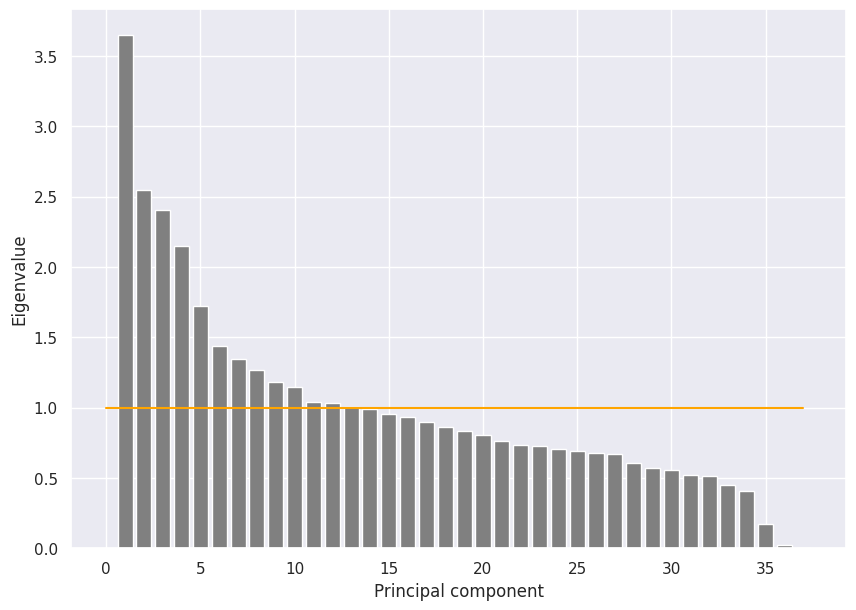

In [ ]:
#scree plot
numClasses = X.shape[1]
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

### Build and evaluate model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1234)

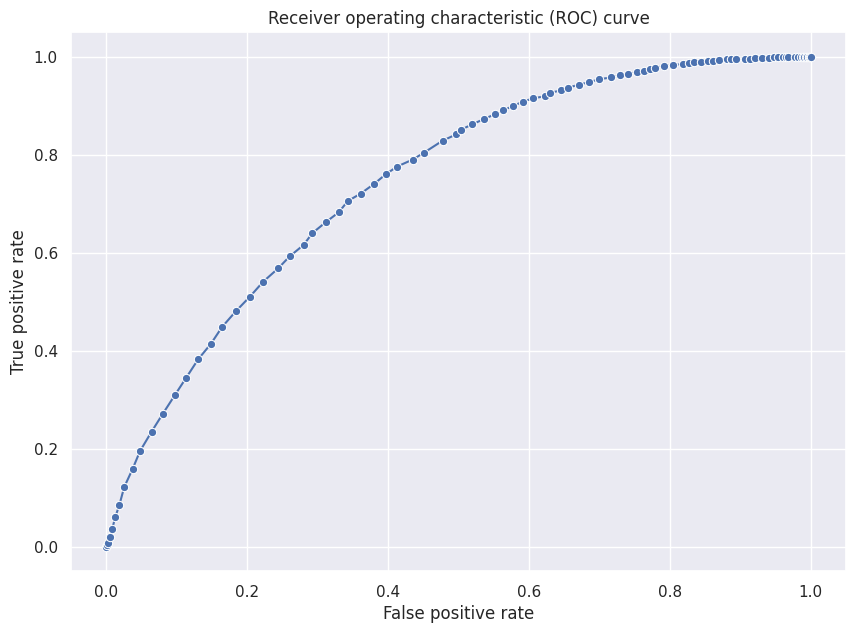

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,prob)

fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr, y=tpr, marker = 'o')
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [ ]:
auc(fpr, tpr)

0.7460931904177069

In [ ]:
accuracy_score(y_test, pred)

0.7939384935373645

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

pd.DataFrame(
confusion_matrix(y_test, pred, labels=[True, False]),
columns=['Predicted: Open', 'Predicted: Closed'],
index=['Actual: Open', 'Actual: Closed'])

,Predicted: Open,Predicted: Closed
Actual: Open,4848,235
Actual: Closed,1152,496


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [("DT", DecisionTreeClassifier()),
              ("RF", RandomForestClassifier()),
              ("GBDT", GradientBoostingClassifier()),
              ("LR", LogisticRegression())
             ]

In [ ]:
stacking_model = StackingClassifier(estimators=estimators,cv=5,passthrough=False)

In [ ]:
params = {
    "DT__max_depth": [8, 16],
    "GBDT__n_estimators":[100,300],
    "RF__min_samples_split":[2,5,10]
}

stack_grid = GridSearchCV(stacking_model, params, cv=3, verbose=4, scoring='accuracy', refit=True, n_jobs=-1)
stack_grid.fit(X_train, y_train)
print(stack_grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'DT__max_depth': 8, 'GBDT__n_estimators': 100, 'RF__min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(stack_grid.best_params_)

{'DT__max_depth': 8, 'GBDT__n_estimators': 100, 'RF__min_samples_split': 2}


In [ ]:
best_estimators = [("DT", DecisionTreeClassifier(max_depth=stack_grid.best_params_['DT__max_depth'])),
              ("RF", RandomForestClassifier(min_samples_split=stack_grid.best_params_['RF__min_samples_split'])),
              ("GBDT", GradientBoostingClassifier(n_estimators=stack_grid.best_params_['GBDT__n_estimators'])),
              ("LR", LogisticRegression())
             ]

best_stacking_model = StackingClassifier(estimators=best_estimators,cv=5,passthrough=False)
best_stacking_model.fit(X_train,y_train)
ensemble_pred = best_stacking_model.predict(X_test)
ensemble_prob = best_stacking_model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

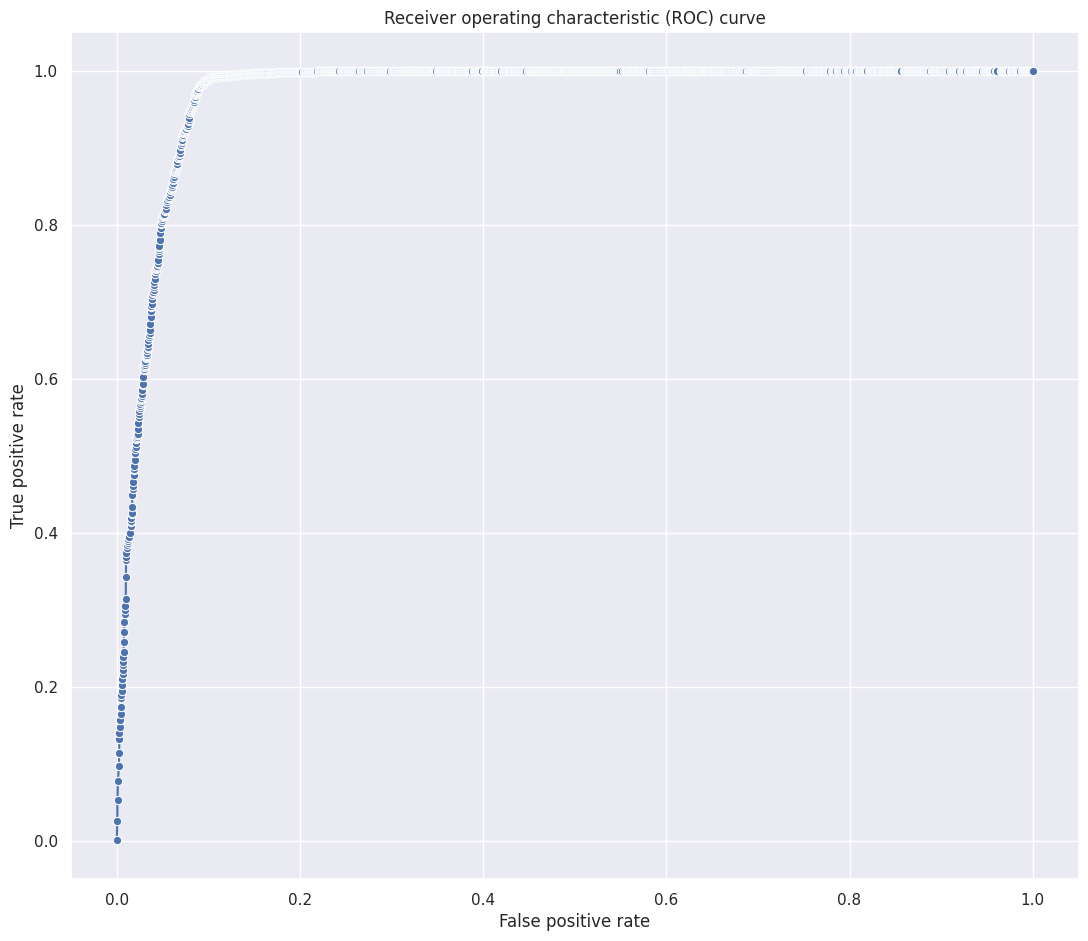

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,ensemble_prob)

fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr, y=tpr, marker = 'o')
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [ ]:
auc(fpr, tpr)

0.9711063847982231

In [ ]:
accuracy_score(y_test, ensemble_pred)

0.9339585775693631

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

pd.DataFrame(
confusion_matrix(y_test, ensemble_pred, labels=[True, False]),
columns=['Predicted: Open', 'Predicted: Closed'],
index=['Actual: Open', 'Actual: Closed'])

,Predicted: Open,Predicted: Closed
Actual: Open,4844,262
Actual: Closed,414,4716


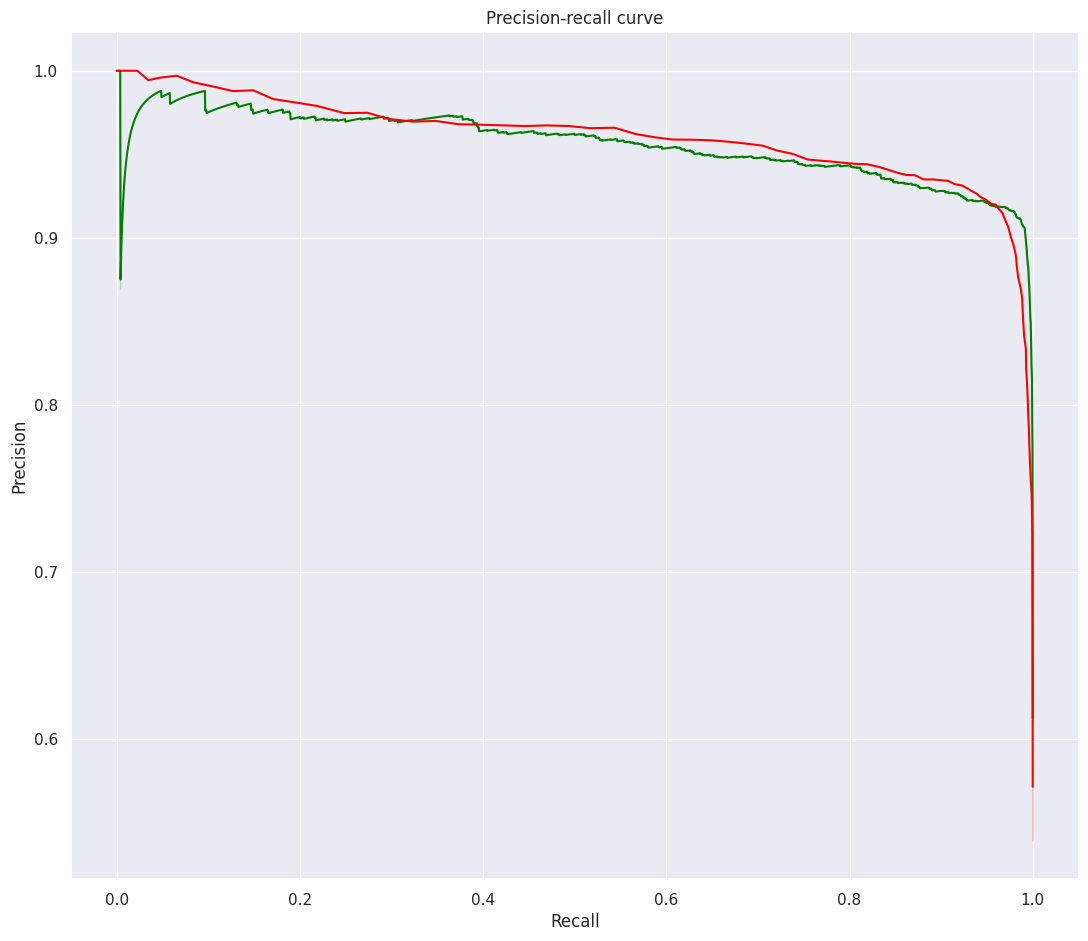

In [ ]:
precision_ensemble, recall_ensemble, thresholds_ensemble = precision_recall_curve(y_test,ensemble_prob)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,prob)

fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot (x=recall_ensemble, y=precision_ensemble, color = 'green')
sns.lineplot (x=recall_rf, y=precision_rf, color = 'red')


plt.title('Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()